In [240]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

In [54]:
t1_dir = os.path.join("./Assignment_fuel", "telemetry_1.csv")
t2_dir = os.path.join("./Assignment_fuel", "telemetry_2.csv")

In [19]:
t1 = pd.read_csv(t1_dir)

In [97]:
t2 = pd.read_csv(t2_dir)

## Basic EDA:

In [22]:
print(t1.shape)
t2.shape

(408670, 5)


(425893, 4)

In [24]:
print(list(t1.columns))
list(t2.columns)

['vehicle_id', 'timestamp', 'speed', 'odometer', 'fuel_level']


['vehicle_id', 'timestamp', 'val', 'name']

In [25]:
t1.head()

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,NaN,NaN
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,NaN
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,NaN,NaN,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,NaN
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,NaN,NaN


In [26]:
t2.head()

,vehicle_id,timestamp,val,name
0,vehicle_4,2024-07-23 19:56:44+05:30,0.0,speed
1,vehicle_11,2024-04-04 22:33:56+05:30,52.7,speed
2,vehicle_3,2024-07-18 23:30:04.027000+05:30,5.8,speed
3,vehicle_3,2024-05-22 00:49:49.402000+05:30,34.4,speed
4,vehicle_10,2024-07-16 05:48:11.710000+05:30,42.8,speed


In [30]:
t1.isna().sum()

vehicle_id         0
timestamp          0
speed         137590
odometer      136104
fuel_level    312111
dtype: int64

In [31]:
t2.isna().sum()

vehicle_id    0
timestamp     0
val           0
name          0
dtype: int64

In [28]:
t1['vehicle_id'].value_counts()

vehicle_id
vehicle_3     73993
vehicle_1     57933
vehicle_11    49746
vehicle_8     43036
vehicle_7     38509
vehicle_5     36515
vehicle_6     34865
vehicle_2     24120
vehicle_10    22223
vehicle_4     17591
vehicle_9     10139
Name: count, dtype: int64

In [32]:
t2['vehicle_id'].value_counts()

vehicle_id
vehicle_3     91331
vehicle_8     52886
vehicle_7     47950
vehicle_5     45048
vehicle_6     42731
vehicle_1     41369
vehicle_11    35616
vehicle_10    26222
vehicle_2     17372
vehicle_4     15817
vehicle_9      9551
Name: count, dtype: int64

Initial Insights (Appended here):
1. Vehicles numbering 1 to 11
2. Timestamps of telemetry 1 and 2 should probably be of different time zones
3. Telemetry 1 sees ~100000 null value rows, while telemetry 2 sees none; data cleaning required, will be done after combining the 2 telemetries.
4. However, whether any data is corrupted in telemetry 2 (which seems to have no null values remains to be seen).

## Merging the Telemetries:

In [34]:
t1.head(3).loc[:, ['vehicle_id', 'timestamp']], t2.head(3).loc[:, ['vehicle_id', 'timestamp']]

(  vehicle_id                         timestamp
 0  vehicle_4         2024-06-06 14:26:23-07:00
 1  vehicle_8  2024-07-05 22:24:12.856000-07:00
 2  vehicle_3  2024-06-20 12:57:59.306000-07:00,
    vehicle_id                         timestamp
 0   vehicle_4         2024-07-23 19:56:44+05:30
 1  vehicle_11         2024-04-04 22:33:56+05:30
 2   vehicle_3  2024-07-18 23:30:04.027000+05:30)

In [35]:
t1['timestamp'].value_counts()

timestamp
2024-07-14 20:34:54-07:00           5
2024-07-21 14:05:18-07:00           3
2024-07-21 16:22:22-07:00           3
2024-07-21 09:54:21-07:00           3
2024-07-01 12:17:50-07:00           2
                                   ..
2024-06-16 15:58:05-07:00           1
2024-06-29 08:26:11.663000-07:00    1
2024-05-25 13:47:01.308000-07:00    1
2024-01-09 12:23:26-08:00           1
2024-07-20 11:43:23-07:00           1
Name: count, Length: 407713, dtype: int64

In [43]:
type(t1.loc[:0, 'timestamp'].values[0])

str

In [44]:
t1.loc[:0, 'timestamp'].values[0]

'2024-06-06 14:26:23-07:00'

In [48]:
tstmp_fmt = "%Y-%m-%d %H:%M:%S%z"
pd.to_datetime(t1.loc[:0, 'timestamp'].values[0], format=tstmp_fmt)

Timestamp('2024-06-06 14:26:23-0700', tz='UTC-07:00')

In [49]:
timestamp_values = t1['timestamp']

In [94]:
def convert_to_datetime(row):
    try:
        return pd.to_datetime(row, format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)
    except ValueError:
        return pd.to_datetime(row, format="%Y-%m-%d %H:%M:%S%z", utc=True)

timestamp_values[:20].apply(convert_to_datetime)

0           2024-06-06 21:26:23+00:00
1    2024-07-06 05:24:12.856000+00:00
2    2024-06-20 19:57:59.306000+00:00
3    2024-07-25 01:04:23.776000+00:00
4           2024-07-06 18:08:03+00:00
5    2024-07-03 13:27:43.287000+00:00
6    2024-05-25 06:41:56.754000+00:00
7    2024-07-25 17:05:23.786000+00:00
8    2024-06-20 07:02:37.888000+00:00
9    2024-07-22 15:42:56.075000+00:00
10   2024-06-20 02:35:17.896000+00:00
11          2024-04-25 06:03:44+00:00
12          2024-07-19 15:26:56+00:00
13   2024-07-28 14:34:06.133000+00:00
14   2024-07-01 02:00:57.669000+00:00
15   2024-05-26 18:20:10.447000+00:00
16          2024-07-30 12:35:16+00:00
17   2024-06-11 10:49:50.269000+00:00
18   2024-06-22 19:13:01.085000+00:00
19          2024-07-22 13:28:01+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [55]:
t1.loc[:, 'timestamp'] = t1.loc[:, 'timestamp'].apply(convert_to_datetime)
t2.loc[:, 'timestamp'] = t2.loc[:, 'timestamp'].apply(convert_to_datetime)

In [56]:
t1_copy = t1.copy(deep=True)
t2_copy = t2.copy(deep=True)

In [183]:
t1 = t1_copy.copy(deep=True)
t2 = t2_copy.copy(deep=True)

In [184]:
t1['timestamp'] = pd.to_datetime(t1['timestamp'])
t2['timestamp'] = pd.to_datetime(t2['timestamp'])

In [185]:
t2['name'].value_counts()

name
odometer      181000
speed         180292
fuel_level     64601
Name: count, dtype: int64

In [186]:
t2.loc[:, 'odometer'] = np.nan
t2.loc[:, 'speed'] = np.nan
t2.loc[:, 'fuel_level'] = np.nan

In [187]:
t2.head()

,vehicle_id,timestamp,val,name,odometer,speed,fuel_level
0,vehicle_4,2024-07-23 14:26:44+00:00,0.0,speed,NaN,NaN,NaN
1,vehicle_11,2024-04-04 17:03:56+00:00,52.7,speed,NaN,NaN,NaN
2,vehicle_3,2024-07-18 18:00:04.027000+00:00,5.8,speed,NaN,NaN,NaN
3,vehicle_3,2024-05-21 19:19:49.402000+00:00,34.4,speed,NaN,NaN,NaN
4,vehicle_10,2024-07-16 00:18:11.710000+00:00,42.8,speed,NaN,NaN,NaN


In [188]:
def add_vals(row):
    row[row['name']] = row['val']
    return row

In [189]:
def dummy(row):
    return row

In [190]:
t1 = t1.apply(dummy)
t2 = t2.apply(add_vals, axis=1)

In [191]:
t2 = t2.drop(columns=['val', 'name'], axis=1)

In [192]:
t2.head()

,vehicle_id,timestamp,odometer,speed,fuel_level
0,vehicle_4,2024-07-23 14:26:44+00:00,NaN,0.0,NaN
1,vehicle_11,2024-04-04 17:03:56+00:00,NaN,52.7,NaN
2,vehicle_3,2024-07-18 18:00:04.027000+00:00,NaN,5.8,NaN
3,vehicle_3,2024-05-21 19:19:49.402000+00:00,NaN,34.4,NaN
4,vehicle_10,2024-07-16 00:18:11.710000+00:00,NaN,42.8,NaN


In [193]:
print(type(t1.loc[:0, 'timestamp'].values[0]))
type(t2.loc[:0, 'timestamp'].values[0])

<class 'numpy.datetime64'>


numpy.datetime64

In [194]:
merged_df = pd.merge(t1, t2, on=['vehicle_id', 'timestamp'], how='outer', suffixes=('_1', '_2'))

In [195]:
merged_df.head()

,vehicle_id,timestamp,speed_1,odometer_1,fuel_level_1,odometer_2,speed_2,fuel_level_2
0,vehicle_4,2024-06-06 21:26:23+00:00,64.2,NaN,NaN,NaN,NaN,NaN
1,vehicle_8,2024-07-06 05:24:12.856000+00:00,1.6,12048.0,NaN,NaN,NaN,NaN
2,vehicle_3,2024-06-20 19:57:59.306000+00:00,NaN,NaN,45.0,NaN,NaN,NaN
3,vehicle_10,2024-07-25 01:04:23.776000+00:00,36.2,1434.7,NaN,NaN,NaN,NaN
4,vehicle_11,2024-07-06 18:08:03+00:00,29.5,NaN,NaN,NaN,NaN,NaN


In [196]:
merged_df['speed'] = merged_df['speed_1'].combine_first(merged_df['speed_2'])
merged_df['odometer'] = merged_df['odometer_1'].combine_first(merged_df['odometer_2'])
merged_df['fuel_level'] = merged_df['fuel_level_1'].combine_first(merged_df['fuel_level_2'])

In [197]:
merged_df = merged_df.drop(columns=['speed_1', 'speed_2', 'odometer_1', 'odometer_2', 'fuel_level_1', 'fuel_level_2'])

In [198]:
merged_df.head()

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 21:26:23+00:00,64.2,NaN,NaN
1,vehicle_8,2024-07-06 05:24:12.856000+00:00,1.6,12048.0,NaN
2,vehicle_3,2024-06-20 19:57:59.306000+00:00,NaN,NaN,45.0
3,vehicle_10,2024-07-25 01:04:23.776000+00:00,36.2,1434.7,NaN
4,vehicle_11,2024-07-06 18:08:03+00:00,29.5,NaN,NaN


In [199]:
final_tm = merged_df.copy(deep=True)

## EDA and Cleaning of Merged Telemetry:

In [200]:
final_tm.shape

(834542, 5)

In [236]:
print("Common merged rows (based on vehicle_id and timestamp): ", (t1.shape[0] + t2.shape[0]) - final_tm.shape[0])

Common merged rows (based on vehicle_id and timestamp):  21


In [201]:
final_tm.isna().sum()

vehicle_id         0
timestamp          0
speed         383176
odometer      380977
fuel_level    673382
dtype: int64

In [202]:
for col in final_tm.columns:
    print(final_tm[col].value_counts())

vehicle_id
vehicle_3     165322
vehicle_1      99299
vehicle_8      95922
vehicle_7      86459
vehicle_11     85359
vehicle_5      81562
vehicle_6      77595
vehicle_10     48440
vehicle_2      41491
vehicle_4      33406
vehicle_9      19687
Name: count, dtype: int64
timestamp
2024-07-15 03:34:54+00:00           5
2024-07-23 19:42:55+00:00           4
2024-07-18 16:57:13+00:00           4
2024-05-24 22:42:46+00:00           4
2024-07-11 21:07:38+00:00           4
                                   ..
2024-05-29 21:27:41.620000+00:00    1
2024-07-20 23:30:59+00:00           1
2024-04-07 11:59:57+00:00           1
2024-06-26 18:04:06+00:00           1
2024-06-11 18:50:54.398000+00:00    1
Name: count, Length: 678614, dtype: int64
speed
0.0      143321
72.0       1010
72.9        986
71.1        973
73.1        960
          ...  
112.7         1
111.8         1
112.4         1
110.4         1
109.6         1
Name: count, Length: 1101, dtype: int64
odometer
3612.0     1746
1209.8     1521

In [208]:
final_tm.loc[:, ['vehicle_id', 'timestamp']].value_counts()

vehicle_id  timestamp                       
vehicle_4   2024-07-15 03:34:54+00:00           5
vehicle_3   2024-07-26 18:32:21.435000+00:00    4
            2024-07-16 16:30:33.940000+00:00    4
vehicle_10  2024-07-29 22:21:44.813000+00:00    4
vehicle_11  2024-07-08 01:56:06+00:00           4
                                               ..
vehicle_2   2024-05-29 22:19:45+00:00           1
            2024-05-29 22:19:46+00:00           1
            2024-05-29 22:20:38+00:00           1
            2024-05-29 22:20:42+00:00           1
vehicle_9   2024-07-31 23:59:26+00:00           1
Name: count, Length: 681050, dtype: int64

In [207]:
final_tm = final_tm.sort_values(by=['vehicle_id', 'timestamp'])

In [216]:
boolean_mask = np.isnan(final_tm['speed']) & (final_tm['vehicle_id'] == 'vehicle_1')
final_tm.loc[boolean_mask, :]

,vehicle_id,timestamp,speed,odometer,fuel_level
758435,vehicle_1,2024-01-02 15:20:03+00:00,NaN,466.0,NaN
97369,vehicle_1,2024-01-02 15:20:04+00:00,NaN,NaN,100.0
56879,vehicle_1,2024-01-02 15:21:05+00:00,NaN,466.0,NaN
181554,vehicle_1,2024-01-02 15:21:06+00:00,NaN,NaN,100.0
766082,vehicle_1,2024-01-02 15:22:06+00:00,NaN,466.0,NaN
...,...,...,...,...,...
107218,vehicle_1,2024-07-31 20:16:11+00:00,NaN,NaN,75.0
758068,vehicle_1,2024-07-31 20:16:18+00:00,NaN,29959.0,NaN
378365,vehicle_1,2024-07-31 20:17:14+00:00,NaN,NaN,74.0
769377,vehicle_1,2024-07-31 20:17:16+00:00,NaN,29959.0,NaN


In [231]:
final_tm.loc[final_tm['vehicle_id'] == 'vehicle_1', :].loc[30:50, ['speed', 'odometer', 'fuel_level']]

,speed,odometer,fuel_level
30,NaN,466.0,NaN
31,0.0,NaN,NaN
32,NaN,NaN,100.0
33,NaN,466.0,NaN
34,0.0,NaN,NaN
35,NaN,NaN,100.0
36,NaN,466.0,NaN
37,0.0,NaN,NaN
38,NaN,466.0,NaN
39,NaN,NaN,100.0


In [239]:
boolean_mask = ~np.isnan(final_tm['speed']) & (final_tm['vehicle_id'] == 'vehicle_1')
final_tm.loc[boolean_mask, :].loc[107:200, ['speed', 'odometer', 'fuel_level']]

,speed,odometer,fuel_level
107,0.0,467.0,NaN
110,0.0,NaN,NaN
113,0.0,NaN,NaN
116,0.0,NaN,NaN
119,0.0,NaN,NaN
122,0.0,NaN,NaN
124,0.0,NaN,100.0
127,0.0,NaN,NaN
130,50.8,NaN,NaN
133,74.7,NaN,NaN


Insights from initial EDA: 
1. Cleaning of dataset might not be required, bcuz as observed, the null values probably do not correspond to missing sensor data, but it can probably be inferred that the vehicle was at rest.
2. Speed: null value = 0 kmph, vehicle at rest, and not otherwise
3. Odometer: null value = distance is greatest previous distance recording (after sorting by timestamp)
4. Fuel Value: null value = previous recorded non-null value (after sorting by timestamp)

## Derivative: Working on "seasonal spike of speed" observed in above section: 

In [241]:
# final_tm.to_csv("./final_telemetry.csv", index=False)

In [243]:
vehicle1 = final_tm.loc[final_tm['vehicle_id'] == 'vehicle_1', :]

In [247]:
vehicle1.head(100)

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_1,2024-01-02 15:20:03+00:00,NaN,466.0,NaN
1,vehicle_1,2024-01-02 15:20:04+00:00,NaN,NaN,100.0
2,vehicle_1,2024-01-02 15:20:22+00:00,0.0,NaN,NaN
3,vehicle_1,2024-01-02 15:21:05+00:00,NaN,466.0,NaN
4,vehicle_1,2024-01-02 15:21:06+00:00,NaN,NaN,100.0
...,...,...,...,...,...
95,vehicle_1,2024-01-20 13:34:33+00:00,NaN,467.0,NaN
96,vehicle_1,2024-01-20 13:34:38+00:00,0.0,NaN,NaN
97,vehicle_1,2024-01-20 13:35:22+00:00,NaN,NaN,100.0
98,vehicle_1,2024-01-20 13:35:34+00:00,NaN,467.0,NaN


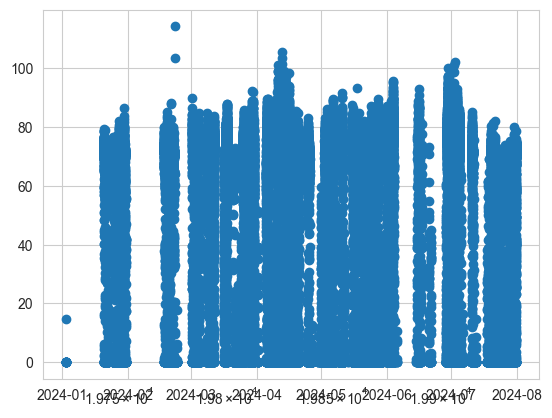

In [252]:
plt.xscale('log')
plt.scatter(vehicle1['timestamp'], vehicle1['speed'])
plt.show()

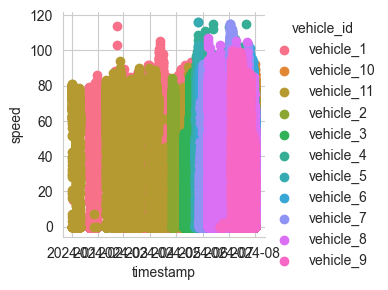

In [249]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(final_tm, hue = 'vehicle_id')
grid.map(plt.scatter, 'timestamp', 'speed')
grid.add_legend()
plt.show()

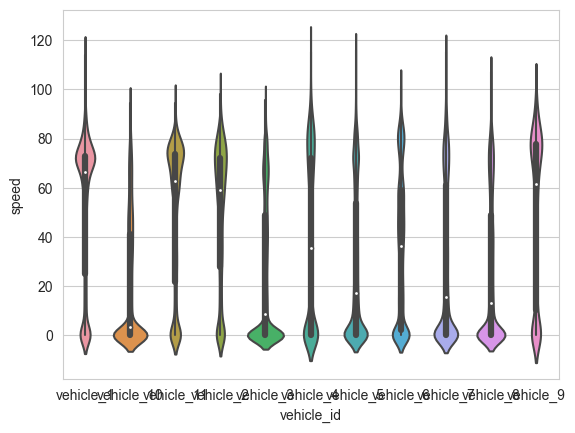

In [253]:
sns.violinplot(x = 'vehicle_id', y = 'speed', data = final_tm)
plt.show()

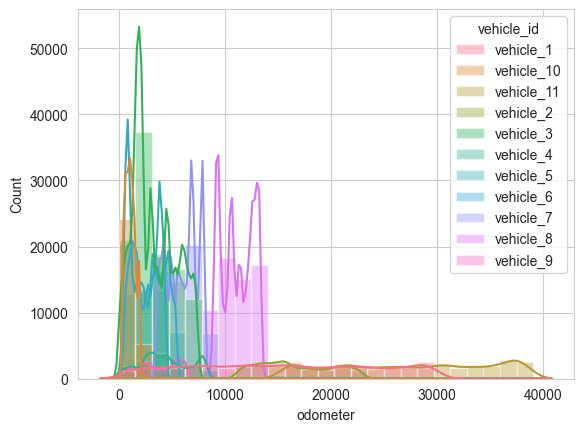

In [255]:
sns.set_style("whitegrid")
sns.histplot(final_tm, x='odometer', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

Proving that odometer values are non-decreasing; Will use this conclusion to derive later insights:
Note: Should not drop null values, but should exclude them in plots to prevent their breaking

In [285]:
# sns.set_style("whitegrid")
# # sns.histplot(final_tm, x='odometer', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
# sns.histplot(final_tm, x='fuel_level', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
# plt.show()

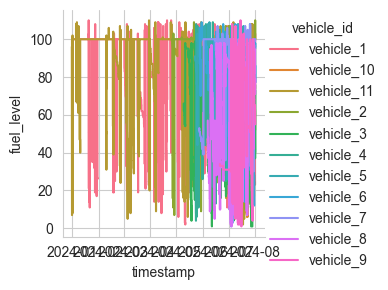

In [273]:
sns.set_style("whitegrid")
fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']), :]
grid = sns.FacetGrid(fuel, hue = 'vehicle_id')
grid.map(plt.plot, 'timestamp', 'fuel_level')
grid.add_legend()
plt.show()

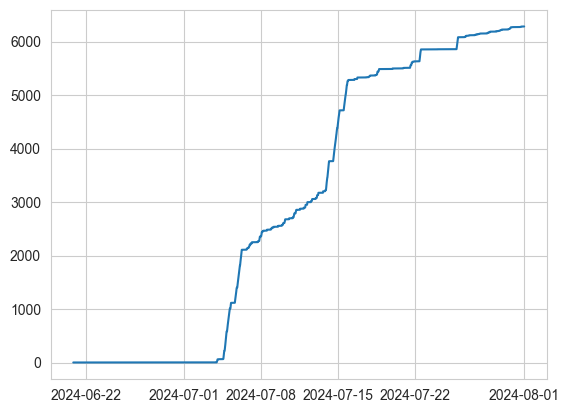

In [263]:
# Proving that odometer values are non-decreasing; Will use this conclusion to derive later insights
vehicle9_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == 'vehicle_9'), :]
plt.plot(vehicle9_odo['timestamp'], vehicle9_odo['odometer'])
plt.show()

In [258]:
final_tm.loc[final_tm['vehicle_id'] == 'vehicle_10', 'odometer'].value_counts()

odometer
1209.8    1499
1958.6     496
1563.4     426
1069.4     347
953.2      344
          ... 
1737.4       2
1979.7       2
1882.1       2
1606.9       2
1982.8       2
Name: count, Length: 2748, dtype: int64

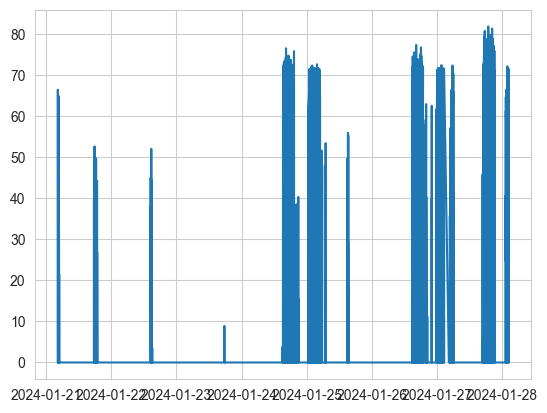

In [283]:
vehicle1_sp = final_tm.loc[(final_tm['vehicle_id'] == 'vehicle_1'), :]
vehicle1_sp.loc[:, 'speed'] = vehicle1_sp['speed'].fillna(0)
plt.plot(vehicle1_sp.loc[2000:7000, 'timestamp'], vehicle1_sp.loc[2000:7000, 'speed'])
plt.show()

## Conclusions (appended here):
1. The initial spotted seasonality did not exist. But the one seasonality was spotted, where the odometer experiences an increase after a spike in speed, meaning that NaN values of speed generally refer to the vehicle being at rest, since no odometer increases are spotted after any lasting number of NaNs in speed.
2. As proved before, odometer values are non-decreasing, thus, from the histogram plot, we are able to infer "rest times" of the vehicle (by looking at high counts at one odometer value).

## Fuel Economy: 

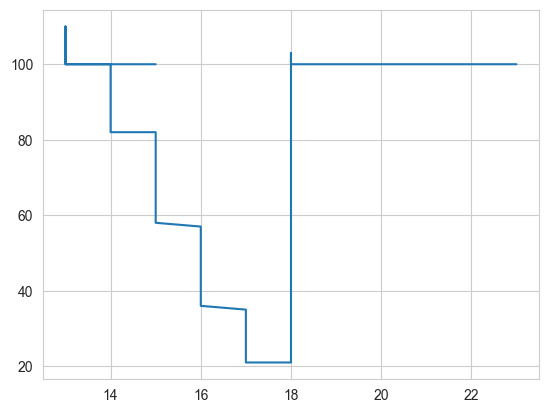

In [298]:
fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == 'vehicle_1') & (final_tm['timestamp'] < pd.to_datetime(np.datetime64('2024-01-21'), utc=True)), :]
plt.plot(fuel['timestamp'].dt.hour, fuel['fuel_level'])
plt.show()

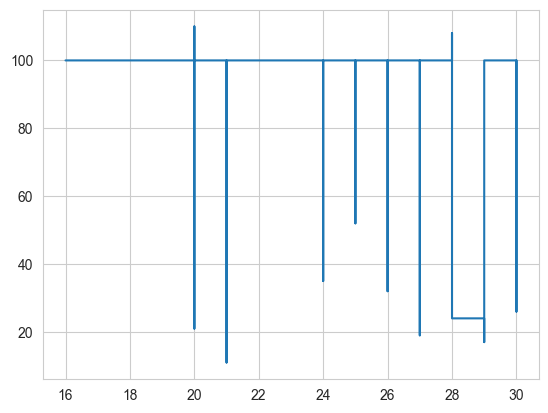

In [307]:
fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == 'vehicle_1') & (final_tm['timestamp'] <= pd.to_datetime(np.datetime64('2024-02-01'), utc=True)) & (pd.to_datetime(np.datetime64('2024-01-15'), utc=True) <= final_tm['timestamp']), :]
plt.plot(fuel['timestamp'].dt.day, fuel['fuel_level'])
plt.show()

In [401]:
def cal_fuel_con(df):
    low = 0
    f_con = 0
    f_ref = 0
    for ind in df.index:
        new_level = df.loc[ind, 'fuel_level']
        if (new_level < low):
            f_con += low - new_level
            low = new_level
        else:
            f_ref += new_level - low
            low = new_level
    return f_ref, f_con

In [403]:
vdata = pd.read_csv('./Assignment_fuel/vehicle_data.csv')

In [406]:
vdata.columns

Index(['id', 'datasource', 'tank_capacity', 'rated_mpg'], dtype='object')

In [457]:
maes = []
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
    dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id), :]
    print(f"Vehicle {i}: ")
    fuel_per_refilled, fuel_per_consumed = cal_fuel_con(fuel)
    start = np.min(dist['odometer'])
    end = np.max(dist['odometer'])
    fuel_consumed = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_consumed) / 100
    fuel_refilled = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_refilled) / 100
    cal_mpg = (end - start) / fuel_consumed
    true_mpg = vdata.loc[vdata['id'] == v_id, 'rated_mpg'].values[0]
    mae = abs(true_mpg - cal_mpg)
    maes.append(mae)
    print(f"Start: {start}")
    print(f"End: {end}")
    print(f"Fuel consumed: {fuel_consumed} gallons")
    print(f"Fuel refilled: {fuel_refilled} gallons")
    print(f"Distance covered: {end - start} miles")
    print(f"Calculated Fuel economy metric: {cal_mpg} Miles/Gallons")
    print(f"Given Fuel economy metric: {true_mpg} Miles/Gallons")
    print(f"Mean Absolute Error metric for Calculated Fuel Economy: {mae}\n")
print(f"Final metric: {np.median(maes)}\n")

Vehicle 1: 
Start: 466.0
End: 29959.0
Fuel consumed: 1074.06 gallons
Fuel refilled: 1087.38 gallons
Distance covered: 29493.0 miles
Calculated Fuel economy metric: 27.459359812300992 Miles/Gallons
Given Fuel economy metric: 35 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 7.540640187699008

Vehicle 2: 
Start: 11132.0
End: 22943.0
Fuel consumed: 310.154 gallons
Fuel refilled: 325.954 gallons
Distance covered: 11811.0 miles
Calculated Fuel economy metric: 38.081082301050444 Miles/Gallons
Given Fuel economy metric: 32 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 6.081082301050444

Vehicle 3: 
Start: 44.7
End: 7360.8
Fuel consumed: 508.60200000000003 gallons
Fuel refilled: 520.1360000000001 gallons
Distance covered: 7316.1 miles
Calculated Fuel economy metric: 14.38472518786792 Miles/Gallons
Given Fuel economy metric: 24 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 9.61527481213208

Vehicle 4: 
Start: 3.0
End: 8228.0

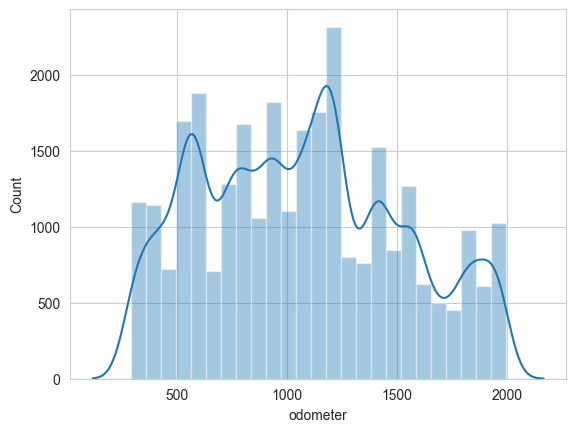

In [318]:
sns.set_style("whitegrid")
sns.histplot(final_tm.loc[final_tm['vehicle_id'] == 'vehicle_10', :], x='odometer', kde=True, kde_kws=dict(cut=3), bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

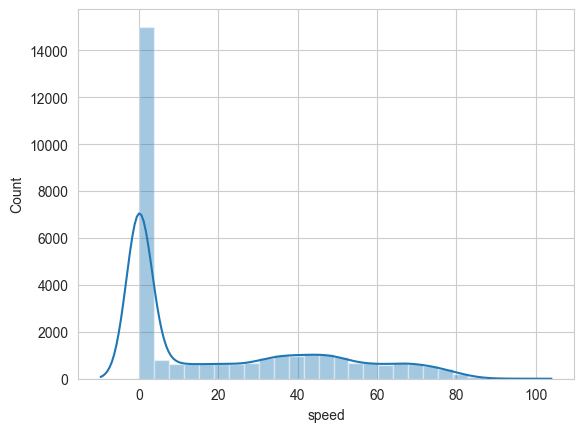

In [319]:
sns.set_style("whitegrid")
sns.histplot(final_tm.loc[final_tm['vehicle_id'] == 'vehicle_10', :], x='speed', kde=True, kde_kws=dict(cut=3), bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

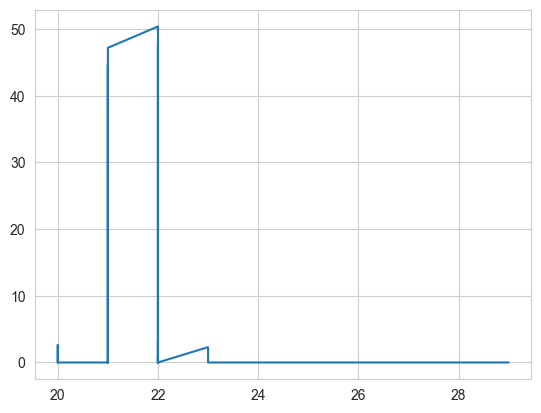

In [339]:
vehicle10_sp = final_tm.loc[(final_tm['vehicle_id'] == 'vehicle_10') & (final_tm['timestamp'] < pd.to_datetime('2024-07-05 20:00:00', utc=True)), :]
vehicle10_sp.loc[:, 'speed'] = vehicle10_sp['speed'].fillna(0)
plt.plot(vehicle10_sp['timestamp'].dt.minute, vehicle10_sp['speed'])
plt.show()

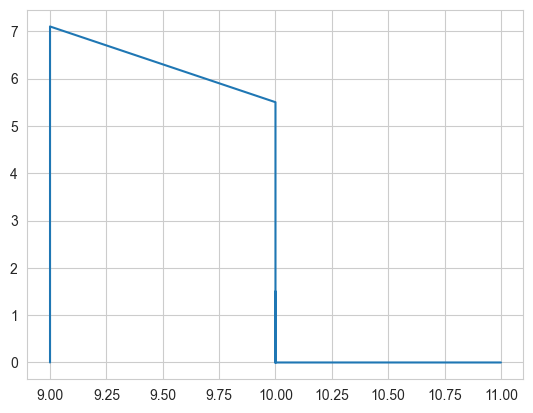

In [345]:
vehicle10_sp = final_tm.loc[(final_tm['vehicle_id'] == 'vehicle_10') & (final_tm['timestamp'] > pd.to_datetime('2024-07-05 20:00:00', utc=True)) & (final_tm['timestamp'] < pd.to_datetime('2024-07-05 20:15:00', utc=True)), :]
vehicle10_sp.loc[:, 'speed'] = vehicle10_sp['speed'].fillna(0)
plt.plot(vehicle10_sp['timestamp'].dt.minute, vehicle10_sp['speed'])
plt.show()

In [353]:
v10['timestamp']

99299    2024-07-05 19:20:40.286000+00:00
99312    2024-07-05 19:21:40.208000+00:00
99322    2024-07-05 19:22:40.210000+00:00
99329    2024-07-05 19:23:40.211000+00:00
99337    2024-07-05 19:24:40.213000+00:00
                       ...               
147703   2024-07-31 18:49:49.242000+00:00
147711   2024-07-31 18:50:49.240000+00:00
147720   2024-07-31 18:51:49.251000+00:00
147729   2024-07-31 18:52:49.244000+00:00
147737   2024-07-31 18:53:49.243000+00:00
Name: timestamp, Length: 6913, dtype: datetime64[ns, UTC]

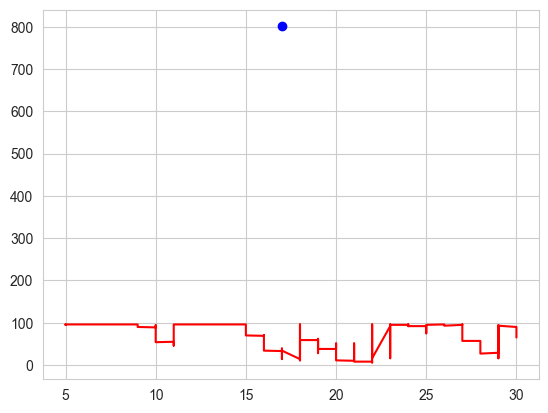

In [368]:
v10 = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == 'vehicle_10') & (final_tm['timestamp'] <= pd.to_datetime('2024-07-31', utc=True)), :]
plt.plot(v10['timestamp'].dt.day, v10['fuel_level'], color='r')
plt.scatter(v10['timestamp'].dt.day, v10['odometer'], color='b')
plt.show()

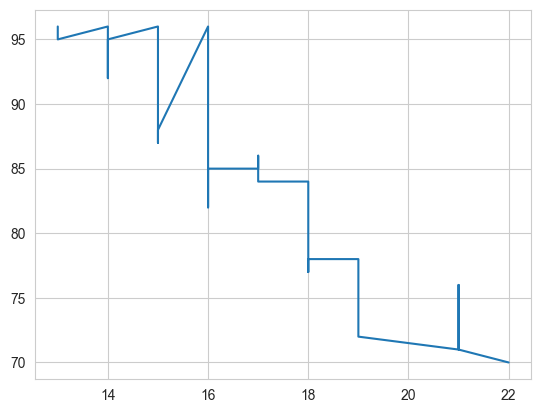

In [374]:
v10 = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == 'vehicle_10') & (final_tm['timestamp'] >= pd.to_datetime('2024-07-15', utc=True)) & (final_tm['timestamp'] <= pd.to_datetime('2024-07-16', utc=True)), :]
plt.plot(v10['timestamp'].dt.hour, v10['fuel_level'])
plt.show()

In [365]:
v10_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == 'vehicle_10'), :]
v10_odo['odometer'].value_counts()

odometer
1209.8    1499
1958.6     496
1563.4     426
1069.4     347
953.2      344
          ... 
1737.4       2
1979.7       2
1882.1       2
1606.9       2
1982.8       2
Name: count, Length: 2748, dtype: int64

In [369]:
v10_fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == 'vehicle_10')]

In [371]:
v10_fuel['fuel_level'].value_counts()

fuel_level
34.0    766
28.0    717
16.0    469
96.0    426
51.0    332
       ... 
45.0     16
47.0     16
7.0      11
49.0     10
6.0       4
Name: count, Length: 91, dtype: int64

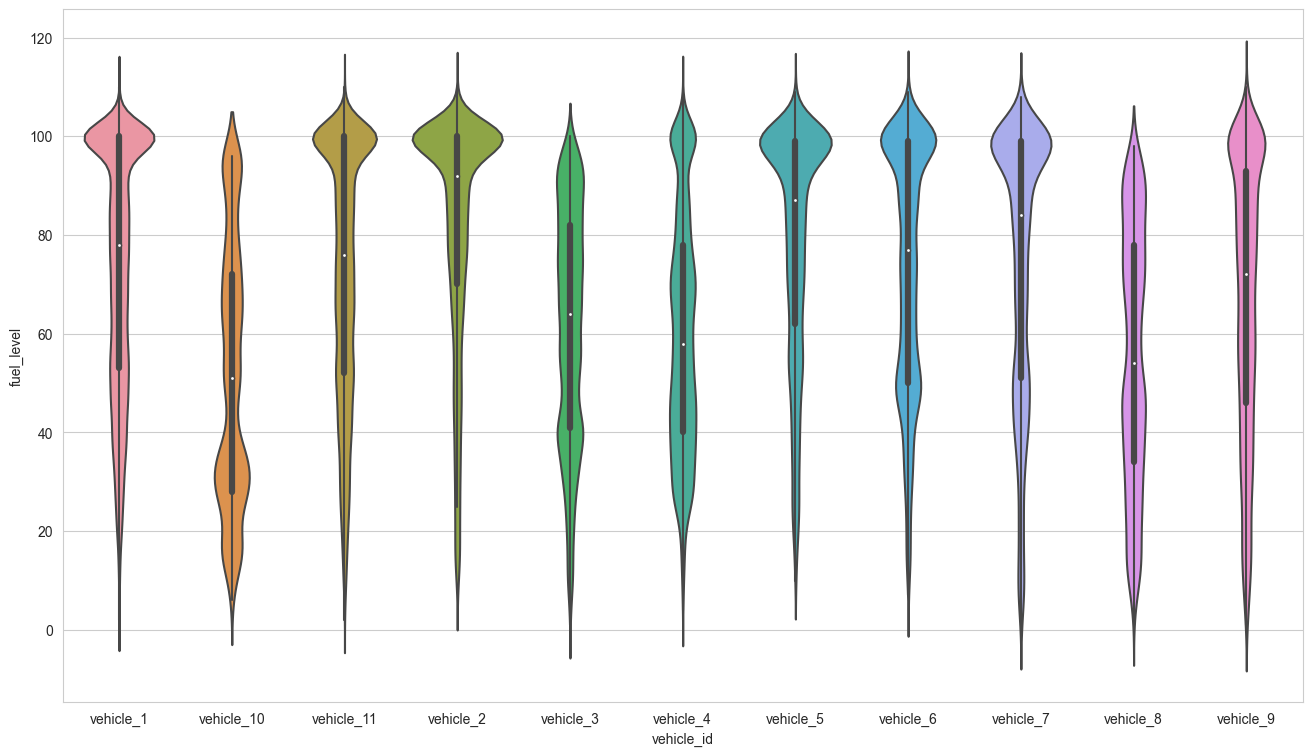

In [379]:
# Comparing fuel consumption of vehicle 10 with other vehicles
plt.figure(figsize=(16, 9))
sns.violinplot(x = 'vehicle_id', y = 'fuel_level', data = final_tm)
plt.show()

In [383]:
# Obtaining fuel consumptions
def cal_fuel_cons(df):
    low = 0
    f_con = 0
    diff = []
    for ind in df.index:
        new_level = df.loc[ind, 'fuel_level']
        if (new_level < low):
            con = low - new_level 
            diff.append(con)
            low = new_level
        else:
            low = new_level
    return diff

In [384]:
cons = {}
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
    cons[v_id] = cal_fuel_cons(fuel)

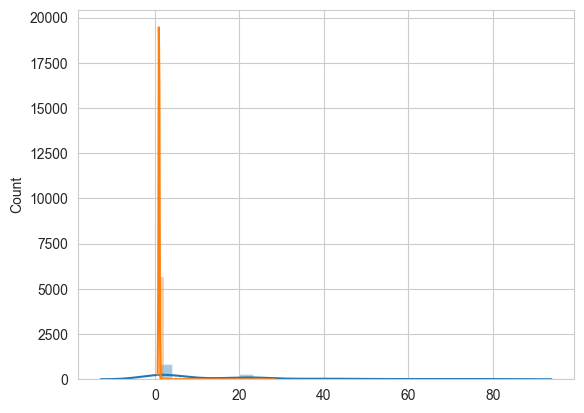

In [399]:
sns.set_style("whitegrid")
# sns.histplot(cons['vehicle_9'], kde=True, kde_kws=dict(cut=3), bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
# sns.histplot(cons['vehicle_3'], kde=True, kde_kws=dict(cut=3), bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(cons['vehicle_10'], kde=True, kde_kws=dict(cut=3), bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(cons['vehicle_1'], kde=True, kde_kws=dict(cut=3), bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
# plt.add_legend()
plt.show()

## More complex ways of calculating Fuel Economy (Experimental):

In [417]:
v1 = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == 'vehicle_1'), :]
v1['timestamp']

1       2024-01-02 15:20:04+00:00
4       2024-01-02 15:21:06+00:00
7       2024-01-02 15:22:06+00:00
10      2024-01-02 15:24:11+00:00
13      2024-01-02 15:25:12+00:00
                   ...           
99287   2024-07-31 20:14:27+00:00
99290   2024-07-31 20:15:29+00:00
99292   2024-07-31 20:16:11+00:00
99295   2024-07-31 20:17:14+00:00
99298   2024-07-31 20:20:21+00:00
Name: timestamp, Length: 34557, dtype: datetime64[ns, UTC]

In [418]:
v1['timestamp'].values[0]

numpy.datetime64('2024-01-02T15:20:04.000000000')

In [421]:
v1_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == 'vehicle_1') & (final_tm['timestamp'] >= pd.to_datetime(v1['timestamp'].values[0], utc=True)), :]
start = np.min(v1_odo['odometer'])
end = np.max(v1_odo['odometer'])

466.0

In [422]:
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
    dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id), :]
    print(f"Vehicle {i}: ")
    fuel_per_refilled, fuel_per_consumed = cal_fuel_con(fuel)
    v1_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & (final_tm['timestamp'] >= pd.to_datetime(fuel['timestamp'].values[0], utc=True)), :]
    start = np.min(v1_odo['odometer'])
    end = np.max(v1_odo['odometer'])
    fuel_consumed = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_consumed) / 100
    fuel_refilled = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_refilled) / 100
    cal_mpg = (end - start) / fuel_consumed
    true_mpg = vdata.loc[vdata['id'] == v_id, 'rated_mpg'].values[0]
    print(f"Start: {start}")
    print(f"End: {end}")
    print(f"Fuel consumed: {fuel_consumed} gallons")
    print(f"Fuel refilled: {fuel_refilled} gallons")
    print(f"Distance covered: {end - start} miles")
    print(f"Calculated Fuel economy metric: {cal_mpg} Miles/Gallons")
    print(f"Given Fuel economy metric: {true_mpg} Miles/Gallons")
    print(f"Mean Absolute Error metric for Calculated Fuel Economy: {abs(true_mpg - cal_mpg)}\n")

Vehicle 1: 
Start: 466.0
End: 29959.0
Fuel consumed: 1074.06 gallons
Fuel refilled: 1087.38 gallons
Distance covered: 29493.0 miles
Calculated Fuel economy metric: 27.459359812300992 Miles/Gallons
Given Fuel economy metric: 35 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 7.540640187699008

Vehicle 2: 
Start: 11132.0
End: 22943.0
Fuel consumed: 310.154 gallons
Fuel refilled: 325.954 gallons
Distance covered: 11811.0 miles
Calculated Fuel economy metric: 38.081082301050444 Miles/Gallons
Given Fuel economy metric: 32 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 6.081082301050444

Vehicle 3: 
Start: 44.7
End: 7360.8
Fuel consumed: 508.60200000000003 gallons
Fuel refilled: 520.1360000000001 gallons
Distance covered: 7316.1 miles
Calculated Fuel economy metric: 14.38472518786792 Miles/Gallons
Given Fuel economy metric: 24 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 9.61527481213208

Vehicle 4: 
Start: 3.0
End: 8228.0

In [442]:
# Best
maes = []
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
    dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id), :]
    print(f"Vehicle {i}: ")
    fuel_per_refilled, fuel_per_consumed = cal_fuel_con(fuel)
    v1_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & (final_tm['timestamp'] >= pd.to_datetime(fuel['timestamp'].values[0], utc=True)) & (final_tm['timestamp'] <= pd.to_datetime(fuel['timestamp'].values[-1], utc=True)), :]
    start = np.min(v1_odo['odometer'])
    end = np.max(v1_odo['odometer'])
    fuel_consumed = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_consumed) / 100
    fuel_refilled = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_refilled) / 100
    cal_mpg = (end - start) / fuel_consumed
    true_mpg = vdata.loc[vdata['id'] == v_id, 'rated_mpg'].values[0]
    mae = abs(true_mpg - cal_mpg)
    maes.append(mae)
    print(f"Start: {start}")
    print(f"End: {end}")
    print(f"Fuel consumed: {fuel_consumed} gallons")
    print(f"Fuel refilled: {fuel_refilled} gallons")
    print(f"Distance covered: {end - start} miles")
    print(f"Calculated Fuel economy metric: {cal_mpg} Miles/Gallons")
    print(f"Given Fuel economy metric: {true_mpg} Miles/Gallons")
    print(f"Mean Absolute Error metric for Calculated Fuel Economy: {mae}\n")
print(f"Final metric: {np.median(maes)}")

Vehicle 1: 
Start: 466.0
End: 29959.0
Fuel consumed: 1074.06 gallons
Fuel refilled: 1087.38 gallons
Distance covered: 29493.0 miles
Calculated Fuel economy metric: 27.459359812300992 Miles/Gallons
Given Fuel economy metric: 35 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 7.540640187699008

Vehicle 2: 
Start: 11132.0
End: 22943.0
Fuel consumed: 310.154 gallons
Fuel refilled: 325.954 gallons
Distance covered: 11811.0 miles
Calculated Fuel economy metric: 38.081082301050444 Miles/Gallons
Given Fuel economy metric: 32 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 6.081082301050444

Vehicle 3: 
Start: 44.7
End: 7360.8
Fuel consumed: 508.60200000000003 gallons
Fuel refilled: 520.1360000000001 gallons
Distance covered: 7316.1 miles
Calculated Fuel economy metric: 14.38472518786792 Miles/Gallons
Given Fuel economy metric: 24 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 9.61527481213208

Vehicle 4: 
Start: 3.0
End: 8228.0

In [428]:
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
    dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id), :]
    print(f"Vehicle {i}: ")
    fuel_per_refilled, fuel_per_consumed = cal_fuel_con(fuel)
    v1_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & (final_tm['timestamp'] >= pd.to_datetime(fuel['timestamp'].values[0], utc=True) - np.timedelta64(30, 'D')) & (final_tm['timestamp'] <= pd.to_datetime(fuel['timestamp'].values[-1], utc=True)), :]
    start = np.min(v1_odo['odometer'])
    end = np.max(v1_odo['odometer'])
    fuel_consumed = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_consumed) / 100
    fuel_refilled = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_refilled) / 100
    cal_mpg = (end - start) / fuel_consumed
    true_mpg = vdata.loc[vdata['id'] == v_id, 'rated_mpg'].values[0]
    print(f"Start: {start}")
    print(f"End: {end}")
    print(f"Fuel consumed: {fuel_consumed} gallons")
    print(f"Fuel refilled: {fuel_refilled} gallons")
    print(f"Distance covered: {end - start} miles")
    print(f"Calculated Fuel economy metric: {cal_mpg} Miles/Gallons")
    print(f"Given Fuel economy metric: {true_mpg} Miles/Gallons")
    print(f"Mean Absolute Error metric for Calculated Fuel Economy: {abs(true_mpg - cal_mpg)}\n")

Vehicle 1: 
Start: 466.0
End: 29959.0
Fuel consumed: 1074.06 gallons
Fuel refilled: 1087.38 gallons
Distance covered: 29493.0 miles
Calculated Fuel economy metric: 27.459359812300992 Miles/Gallons
Given Fuel economy metric: 35 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 7.540640187699008

Vehicle 2: 
Start: 11132.0
End: 22943.0
Fuel consumed: 310.154 gallons
Fuel refilled: 325.954 gallons
Distance covered: 11811.0 miles
Calculated Fuel economy metric: 38.081082301050444 Miles/Gallons
Given Fuel economy metric: 32 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 6.081082301050444

Vehicle 3: 
Start: 44.7
End: 7360.8
Fuel consumed: 508.60200000000003 gallons
Fuel refilled: 520.1360000000001 gallons
Distance covered: 7316.1 miles
Calculated Fuel economy metric: 14.38472518786792 Miles/Gallons
Given Fuel economy metric: 24 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 9.61527481213208

Vehicle 4: 
Start: 3.0
End: 8228.0

In [427]:
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
    dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id), :]
    print(f"Vehicle {i}: ")
    fuel_per_refilled, fuel_per_consumed = cal_fuel_con(fuel)
    v1_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & (final_tm['timestamp'] >= pd.to_datetime(fuel['timestamp'].values[0], utc=True) - np.timedelta64(30, 'D')) & (final_tm['timestamp'] <= pd.to_datetime(fuel['timestamp'].values[-1], utc=True) + np.timedelta64(30, 'D')), :]
    start = np.min(v1_odo['odometer'])
    end = np.max(v1_odo['odometer'])
    fuel_consumed = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_consumed) / 100
    fuel_refilled = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_refilled) / 100
    cal_mpg = (end - start) / fuel_consumed
    true_mpg = vdata.loc[vdata['id'] == v_id, 'rated_mpg'].values[0]
    print(f"Start: {start}")
    print(f"End: {end}")
    print(f"Fuel consumed: {fuel_consumed} gallons")
    print(f"Fuel refilled: {fuel_refilled} gallons")
    print(f"Distance covered: {end - start} miles")
    print(f"Calculated Fuel economy metric: {cal_mpg} Miles/Gallons")
    print(f"Given Fuel economy metric: {true_mpg} Miles/Gallons")
    print(f"Mean Absolute Error metric for Calculated Fuel Economy: {abs(true_mpg - cal_mpg)}\n")

Vehicle 1: 
Start: 466.0
End: 29959.0
Fuel consumed: 1074.06 gallons
Fuel refilled: 1087.38 gallons
Distance covered: 29493.0 miles
Calculated Fuel economy metric: 27.459359812300992 Miles/Gallons
Given Fuel economy metric: 35 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 7.540640187699008

Vehicle 2: 
Start: 11132.0
End: 22943.0
Fuel consumed: 310.154 gallons
Fuel refilled: 325.954 gallons
Distance covered: 11811.0 miles
Calculated Fuel economy metric: 38.081082301050444 Miles/Gallons
Given Fuel economy metric: 32 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 6.081082301050444

Vehicle 3: 
Start: 44.7
End: 7360.8
Fuel consumed: 508.60200000000003 gallons
Fuel refilled: 520.1360000000001 gallons
Distance covered: 7316.1 miles
Calculated Fuel economy metric: 14.38472518786792 Miles/Gallons
Given Fuel economy metric: 24 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 9.61527481213208

Vehicle 4: 
Start: 3.0
End: 8228.0

In [459]:
maes = []
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id) & ~np.isnan(final_tm['odometer']), :]
    dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & ~np.isnan(final_tm['odometer']), :]
    print(f"Vehicle {i}: ")
    fuel_per_refilled, fuel_per_consumed = cal_fuel_con(fuel)
    v1_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & (final_tm['timestamp'] >= pd.to_datetime(fuel['timestamp'].values[0], utc=True)) & (final_tm['timestamp'] <= pd.to_datetime(fuel['timestamp'].values[-1], utc=True)), :]
    start = np.min(v1_odo['odometer'])
    end = np.max(v1_odo['odometer'])
    fuel_consumed = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_consumed) / 100
    fuel_refilled = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_refilled) / 100
    cal_mpg = (end - start) / fuel_consumed
    true_mpg = vdata.loc[vdata['id'] == v_id, 'rated_mpg'].values[0]
    mae = abs(true_mpg - cal_mpg)
    maes.append(mae)
    print(f"Start: {start}")
    print(f"End: {end}")
    print(f"Fuel consumed: {fuel_consumed} gallons")
    print(f"Fuel refilled: {fuel_refilled} gallons")
    print(f"Distance covered: {end - start} miles")
    print(f"Calculated Fuel economy metric: {cal_mpg} Miles/Gallons")
    print(f"Given Fuel economy metric: {true_mpg} Miles/Gallons")
    print(f"Mean Absolute Error metric for Calculated Fuel Economy: {mae}\n")
print(f"Final metric: {np.median(maes)}")

Vehicle 1: 
Start: 466.0
End: 29959.0
Fuel consumed: 956.7 gallons
Fuel refilled: 970.02 gallons
Distance covered: 29493.0 miles
Calculated Fuel economy metric: 30.827845719661333 Miles/Gallons
Given Fuel economy metric: 35 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 4.172154280338667

Vehicle 2: 
Start: 11132.0
End: 22943.0
Fuel consumed: 251.852 gallons
Fuel refilled: 267.652 gallons
Distance covered: 11811.0 miles
Calculated Fuel economy metric: 46.896590060829375 Miles/Gallons
Given Fuel economy metric: 32 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 14.896590060829375

Vehicle 3: 
Start: 71.5
End: 7254.5
Fuel consumed: 77.42 gallons
Fuel refilled: 87.69 gallons
Distance covered: 7183.0 miles
Calculated Fuel economy metric: 92.77964350297081 Miles/Gallons
Given Fuel economy metric: 24 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 68.77964350297081

Vehicle 4: 
Start: 3.0
End: 8228.0
Fuel consumed: 269.62 gal

C:\Users\Admin\AppData\Local\Temp\ipykernel_22924\2039371229.py:13: RuntimeWarning: invalid value encountered in double_scalars
  cal_mpg = (end - start) / fuel_consumed


In [460]:
maes = []
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    # The following vehicles might experience fuel consumption even while rest, as a lower gallon amount is seen with the following
    if (i == 11 or i == 9 or i == 4 or i == 1):
        fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id) & ~np.isnan(final_tm['odometer']), :]
        dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & ~np.isnan(final_tm['odometer']), :]
    else:
        fuel = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
        dist = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id), :]
    print(f"Vehicle {i}: ")
    fuel_per_refilled, fuel_per_consumed = cal_fuel_con(fuel)
    v1_odo = final_tm.loc[~np.isnan(final_tm['odometer']) & (final_tm['vehicle_id'] == v_id) & (final_tm['timestamp'] >= pd.to_datetime(fuel['timestamp'].values[0], utc=True)) & (final_tm['timestamp'] <= pd.to_datetime(fuel['timestamp'].values[-1], utc=True)), :]
    start = np.min(v1_odo['odometer'])
    end = np.max(v1_odo['odometer'])
    fuel_consumed = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_consumed) / 100
    fuel_refilled = (vdata.loc[vdata['id'] == v_id, 'tank_capacity'].values[0] * fuel_per_refilled) / 100
    cal_mpg = (end - start) / fuel_consumed
    true_mpg = vdata.loc[vdata['id'] == v_id, 'rated_mpg'].values[0]
    mae = abs(true_mpg - cal_mpg)
    maes.append(mae)
    print(f"Start: {start}")
    print(f"End: {end}")
    print(f"Fuel consumed: {fuel_consumed} gallons")
    print(f"Fuel refilled: {fuel_refilled} gallons")
    print(f"Distance covered: {end - start} miles")
    print(f"Calculated Fuel economy metric: {cal_mpg} Miles/Gallons")
    print(f"Given Fuel economy metric: {true_mpg} Miles/Gallons")
    print(f"Mean Absolute Error metric for Calculated Fuel Economy: {mae}\n")
print(f"Final metric: {np.median(maes)}")

Vehicle 1: 
Start: 466.0
End: 29959.0
Fuel consumed: 956.7 gallons
Fuel refilled: 970.02 gallons
Distance covered: 29493.0 miles
Calculated Fuel economy metric: 30.827845719661333 Miles/Gallons
Given Fuel economy metric: 35 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 4.172154280338667

Vehicle 2: 
Start: 11132.0
End: 22943.0
Fuel consumed: 310.154 gallons
Fuel refilled: 325.954 gallons
Distance covered: 11811.0 miles
Calculated Fuel economy metric: 38.081082301050444 Miles/Gallons
Given Fuel economy metric: 32 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 6.081082301050444

Vehicle 3: 
Start: 44.7
End: 7360.8
Fuel consumed: 508.60200000000003 gallons
Fuel refilled: 520.1360000000001 gallons
Distance covered: 7316.1 miles
Calculated Fuel economy metric: 14.38472518786792 Miles/Gallons
Given Fuel economy metric: 24 Miles/Gallons
Mean Absolute Error metric for Calculated Fuel Economy: 9.61527481213208

Vehicle 4: 
Start: 3.0
End: 8228.0
Fu

## More in-depth EDA

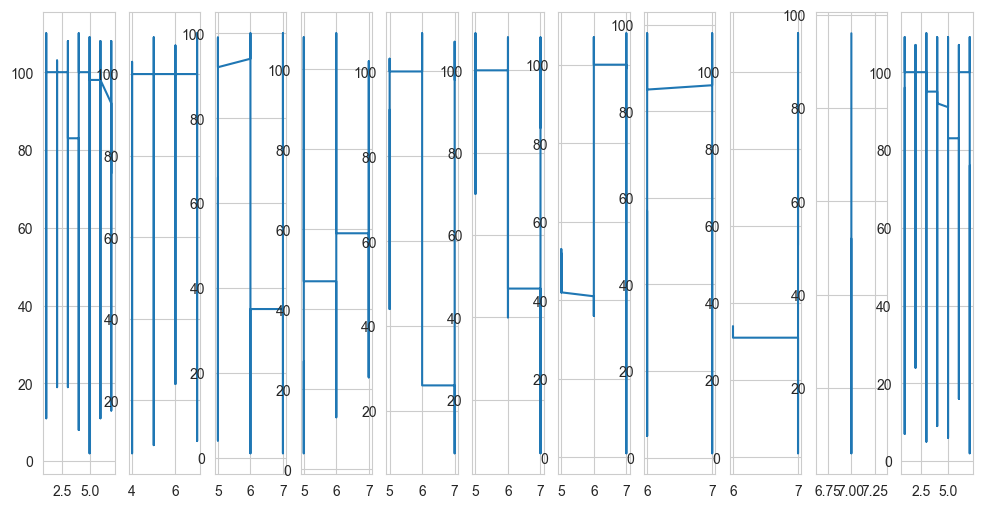

In [436]:
fig, axs = plt.subplots(1, 11, figsize=(12, 6))
for i in range(11):
    v_id = 'vehicle_' + str(i + 1)
    df = final_tm.loc[~np.isnan(final_tm['fuel_level']) & (final_tm['vehicle_id'] == v_id), :]
    axs[i].plot(df['timestamp'].dt.month, df['fuel_level'])
plt.show()

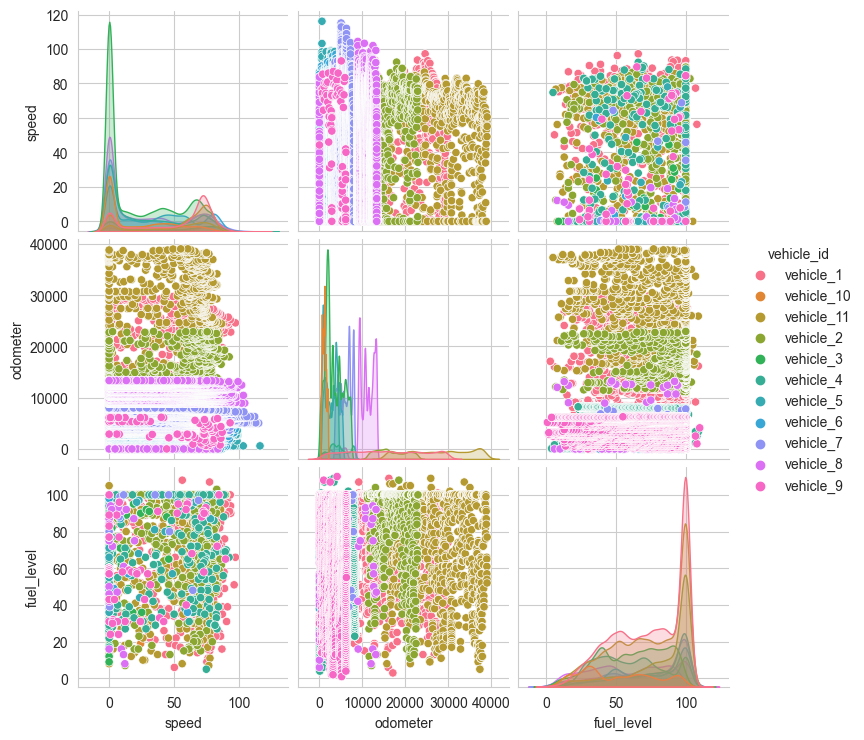

In [437]:
sns.set_style("whitegrid")
sns.pairplot(final_tm, hue = 'vehicle_id')
plt.show()

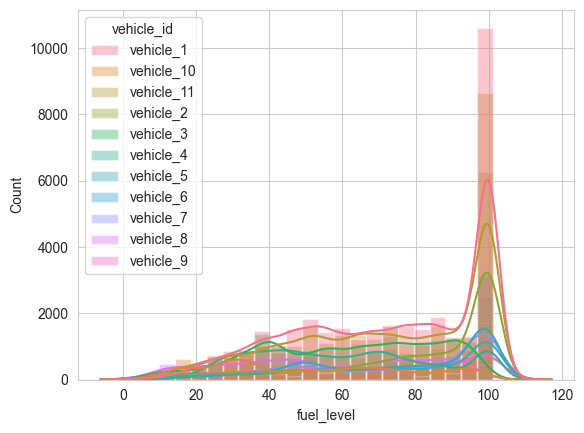

In [438]:
sns.set_style("whitegrid")
# sns.histplot(final_tm, x='odometer', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(final_tm, x='fuel_level', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

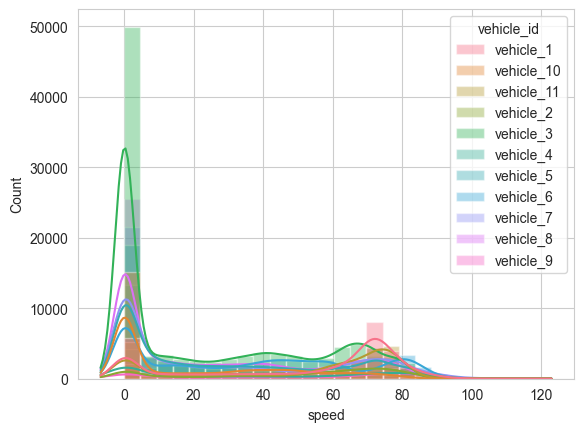

In [439]:
sns.set_style("whitegrid")
# sns.histplot(final_tm, x='odometer', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(final_tm, x='speed', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

In [444]:
vsp = final_tm.loc[~np.isnan(final_tm['speed']) & (final_tm['vehicle_id'] == 'vehicle_3'), :]
mean = np.mean(vsp['speed'])
std = np.std(vsp['speed'])
vsp['speed'] = vsp['speed'].apply(lambda x: (x - mean) / std)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22924\1403851625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vsp['speed'] = vsp['speed'].apply(lambda x: (x - mean) / std)


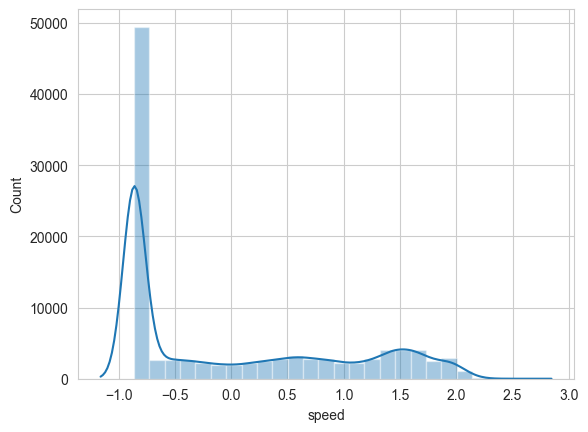

In [445]:
sns.set_style("whitegrid")
# sns.histplot(final_tm, x='odometer', kde=True, kde_kws=dict(cut=3), hue='vehicle_id', bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(vsp, x='speed', kde=True, kde_kws=dict(cut=3), bins=25, alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

In [447]:
vsp1 = vsp.loc[vsp['speed'] >= 3, :]
vsp2 = vsp.loc[vsp['speed'] < 3, :]

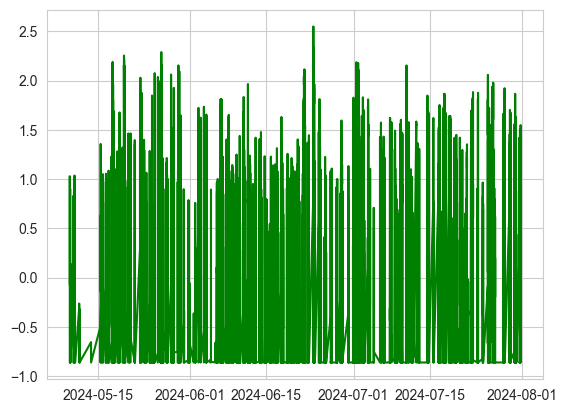

In [448]:
plt.plot(vsp2['timestamp'], vsp2['speed'], color='g')
plt.plot(vsp1['timestamp'], vsp1['speed'], color='r')
plt.show()

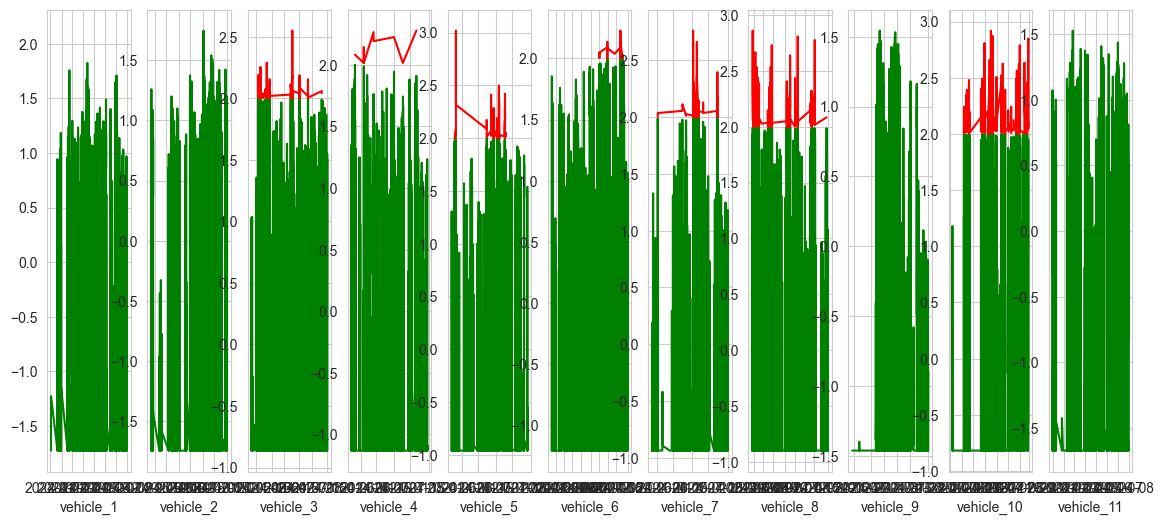

In [456]:
fig, axs = plt.subplots(1, 11, figsize=(14, 6))
for i in range(1, 12):
    v_id = 'vehicle_' + str(i)
    vsp = final_tm.loc[~np.isnan(final_tm['speed']) & (final_tm['vehicle_id'] == v_id), :]
    mean = np.mean(vsp['speed'])
    std = np.std(vsp['speed'])
    vsp.loc[:, 'speed'] = vsp.loc[:, 'speed'].apply(lambda x: (x - mean) / std)
    vsp1 = vsp.loc[vsp['speed'] >= 2, :]
    vsp2 = vsp.loc[vsp['speed'] < 2, :]
    axs[i - 1].plot(vsp2['timestamp'], vsp2['speed'], color='g')
    axs[i - 1].plot(vsp1['timestamp'], vsp1['speed'], color='r')
    axs[i - 1].set_xlabel(v_id)
plt.show()